In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/Users/riyachanduka/Documents/Capstone_INST736/all_pt-csv_charge.csv')

In [3]:
df.head()

,original_sheet,record_number,sheet_id,sid_number,gender,race,dob,computed_age,court_date,intake_date,...,case_number_original_field,court_original_field,judge_name_original_field,court_sentencing_original_field,charge_original_field,violation_reason_or_dont_use,judges_decision_or_dont_use,judge_name_or_dont_use,case_number_or_dont_use,charge_open_refine_field_no_use
0,active_pt,1,active_pt_1,4304458,M,B,11/11/99,18.0,1/24/19,2017-11-30T00:00:00Z,...,D043CR17001009,NaN,Chesser,no information provided,Robbery,NaN,Level 4,Chesser,D043CR17001009,robbery
1,active_pt,2,active_pt_2,3168416,M,W,2/22/94,24.0,3/11/19,2018-07-23T00:00:00Z,...,C18CR18280,NaN,Chesser,no information provided,Burlary 1st,NaN,Level 2,Chesser,C18CR18280,burglary 1st
2,active_pt,3,active_pt_3,3775956,M,W,3/15/81,37.0,1/15/19,2018-07-27T00:00:00Z,...,D043CR181093,NaN,"Riddle, Mr",no information provided,Child abuse 2,NaN,Level 3,Robert Riddle,D043CR181093,child abuse 2nd
3,active_pt,4,active_pt_4,1458033,M,B,12/8/74,43.0,11/27/18,2018-07-16T00:00:00Z,...,C18CR17107,NaN,Stamm,no information provided,Non-support,NaN,Level 2,Stamm,C18CR17107,non-support
4,active_pt,5,active_pt_5,1130717,M,B,1/26/70,48.0,2/25/19,2018-09-10T00:00:00Z,...,18K1679,NaN,Stamm,no information provided,VOP (CDS poss not mari),NaN,Level 3,Stamm,18K1679,vop - cds possession not marijuana


In [13]:
df.shape

(3049, 64)

In [280]:
df.columns

Index(['original_sheet', 'record_number', 'sheet_id', 'sid_number', 'gender',
       'race', 'dob', 'computed_age', 'court_date', 'intake_date', 'charge_1',
       'Charge_Level', 'charge_2', 'charge_3', 'charge_4', 'charge_5',
       'case_number_1', 'case_number_2', 'case_number_3', 'case_number_4',
       'case_number_5', 'case_number_6', 'case_number_7', 'case_number_8',
       'case_number_9', 'risk_assess_level', 'points', 'override_notes',
       'court_type', 'judge_name_1', 'judge_name_2', 'judge_decision',
       'bond_amount', 'bond_percentage', 'bond_y_n', 'additional_comment',
       'address', 'phone_number', 'job_information', 'treatment_notes',
       'health_ins', 'release_date', 'court_sentence_notes', 'violation_date',
       'violation_reason_1', 'violation_reason_2', 'violation_reason_3',
       'risk_assessment_level_original_field',
       'override_details_or_notes_original_field',
       'judges_decision_original_field', 'additional_comments_original_field',
  

In [281]:
new_df=df.groupby(['charge_1','race'], as_index=False)[['points']].mean()

In [282]:
new_df.head()

,charge_1,race,points
0,access after statute,B,NaN
1,accessory after the fact murder,B,NaN
2,act as contractor without a license,B,NaN
3,aggravated animal cruelty,W,NaN
4,alcoholic beverage public,B,NaN


In [283]:
newf = new_df.pivot(index='charge_1', columns='race')

In [284]:
newf.head()

points                  
race                                     A   B   H  OT     W
charge_1                                                    
access after statute                   NaN NaN NaN NaN   NaN
accessory after the fact murder        NaN NaN NaN NaN   NaN
act as contractor without a license    NaN NaN NaN NaN   NaN
aggravated animal cruelty              NaN NaN NaN NaN   NaN
alcoholic beverage public              NaN NaN NaN NaN  11.0

In [285]:
df.columns

Index(['original_sheet', 'record_number', 'sheet_id', 'sid_number', 'gender',
       'race', 'dob', 'computed_age', 'court_date', 'intake_date', 'charge_1',
       'Charge_Level', 'charge_2', 'charge_3', 'charge_4', 'charge_5',
       'case_number_1', 'case_number_2', 'case_number_3', 'case_number_4',
       'case_number_5', 'case_number_6', 'case_number_7', 'case_number_8',
       'case_number_9', 'risk_assess_level', 'points', 'override_notes',
       'court_type', 'judge_name_1', 'judge_name_2', 'judge_decision',
       'bond_amount', 'bond_percentage', 'bond_y_n', 'additional_comment',
       'address', 'phone_number', 'job_information', 'treatment_notes',
       'health_ins', 'release_date', 'court_sentence_notes', 'violation_date',
       'violation_reason_1', 'violation_reason_2', 'violation_reason_3',
       'risk_assessment_level_original_field',
       'override_details_or_notes_original_field',
       'judges_decision_original_field', 'additional_comments_original_field',
  

In [286]:
new_df_risk = df.filter(['charge_1','race','risk_assess_level'], axis=1)

In [287]:
new_df_risk.shape

(3049, 3)

In [288]:
new_df_risk.head()

,charge_1,race,risk_assess_level
0,robbery,B,Detain
1,burglary 1st,W,Detain
2,child abuse 2nd,W,Detain
3,non-support,B,Level 2
4,vop - cds possession not marijuana,B,Level 3


In [289]:
pivot_risk = new_df_risk.pivot_table(index='charge_1', columns='race',values='risk_assess_level',aggfunc='first')

In [290]:
pivot_risk.head(20)

race,A,B,H,OT,W
charge_1,,,,,
access after statute,None,Release without pretrial supervision,None,None,None
accessory after the fact murder,None,No recommendation,None,None,None
act as contractor without a license,None,Release without pretrial supervision,None,None,None
aggravated animal cruelty,None,None,None,None,Level 4
alcoholic beverage public,None,No recommendation,None,None,Detain
alcoholic beverage retail,None,None,None,None,Detain
altered drug test,None,Detain,None,None,Level 4
animal cruelty,None,Detain,None,None,None
armed robbery,None,Detain,None,None,Detain


In [291]:
final_df = pivot_risk.filter(['B','W'], axis=1)

In [292]:
final_df.head(20)

race,B,W
charge_1,,
access after statute,Release without pretrial supervision,None
accessory after the fact murder,No recommendation,None
act as contractor without a license,Release without pretrial supervision,None
aggravated animal cruelty,None,Level 4
alcoholic beverage public,No recommendation,Detain
alcoholic beverage retail,None,Detain
altered drug test,Detain,Level 4
animal cruelty,Detain,None
armed robbery,Detain,Detain


In [293]:
final_df['Similarity'] = np.where(final_df['B']==final_df['W'], True, False)
                     

In [294]:
final_df.head(20)

race,B,W,Similarity
charge_1,,,
access after statute,Release without pretrial supervision,None,False
accessory after the fact murder,No recommendation,None,False
act as contractor without a license,Release without pretrial supervision,None,False
aggravated animal cruelty,None,Level 4,False
alcoholic beverage public,No recommendation,Detain,False
alcoholic beverage retail,None,Detain,False
altered drug test,Detain,Level 4,False
animal cruelty,Detain,None,False
armed robbery,Detain,Detain,True


In [295]:
final_df=final_df.dropna()

In [296]:
final_df.Similarity.value_counts()

True     92
False    40
Name: Similarity, dtype: int64

### For almost 30% of cases the risk assessment tool had different recommendation for Blacks and Whites for the same charge commited

In [297]:
df_Detained_compare = final_df[final_df.Similarity == False]

In [298]:
df_Detained_compare.B.value_counts()

Detain                                  20
No recommendation                        5
Level 3                                  4
Sent by judge                            3
Level 1                                  3
Release without pretrial supervision     3
Level 2                                  1
Level 4                                  1
Name: B, dtype: int64

In [299]:
df_Detained_compare.W.value_counts()

Detain                                  16
No recommendation                        8
Sent by judge                            4
Release without pretrial supervision     3
Level 2                                  3
Level 3                                  3
Level 4                                  2
PA Detainer                              1
Name: W, dtype: int64

In [300]:
df_Detained_Blacks = df_Detained_compare[df_Detained_compare.B == 'Detain']

In [301]:
df_Detained_Blacks.shape

(20, 3)

In [302]:
df_Detained_Blacks

race,B,W,Similarity
charge_1,,,
altered drug test,Detain,Level 4,False
assault 2nd,Detain,Level 3,False
burglary 2nd,Detain,Sent by judge,False
burglary 4th,Detain,Release without pretrial supervision,False
cds,Detain,Release without pretrial supervision,False
cds possession with intent to distribute narcotics,Detain,Sent by judge,False
child abuse 1st,Detain,No recommendation,False
driving without license,Detain,No recommendation,False
dui,Detain,Level 2,False


## When Blacks are Detained whites are given the following recommendations

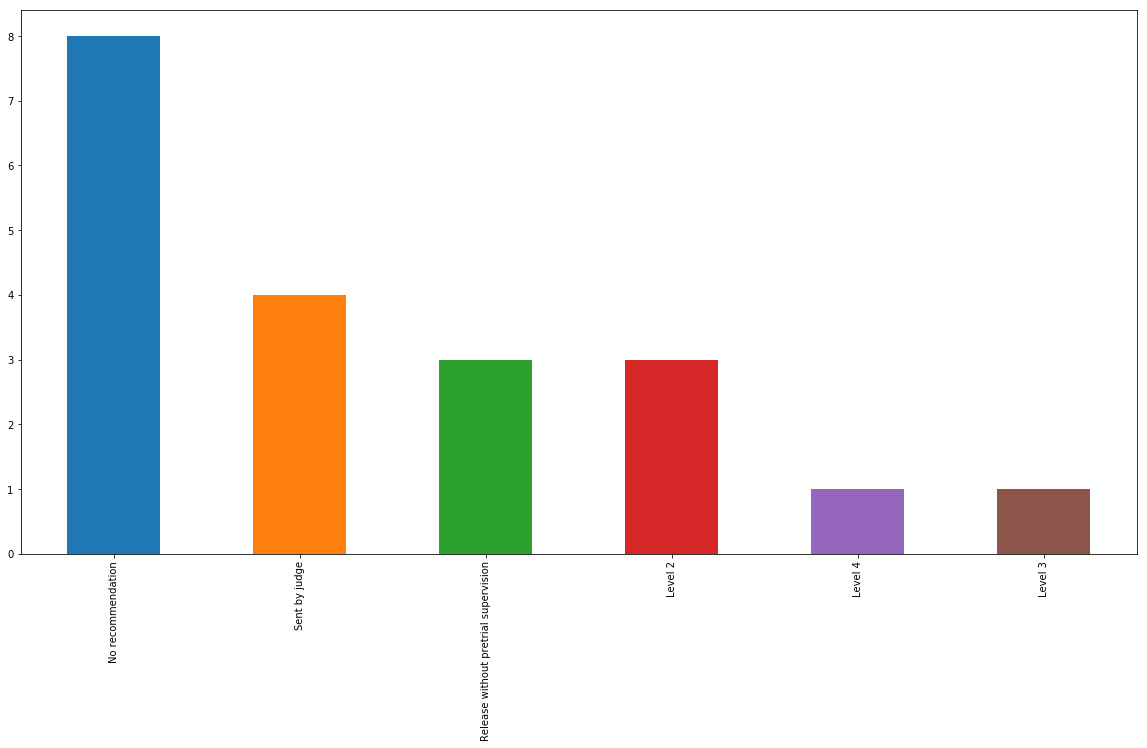

In [303]:
plt.figure(figsize=(20,10))
df_Detained_Blacks['W'].value_counts().plot(kind='bar')

## When Whites are Detained Blacks are given the following recommendations

In [304]:
df_Detained_Whites = df_Detained_compare[df_Detained_compare.W == 'Detain']

In [305]:
df_Detained_Whites.shape

(16, 3)

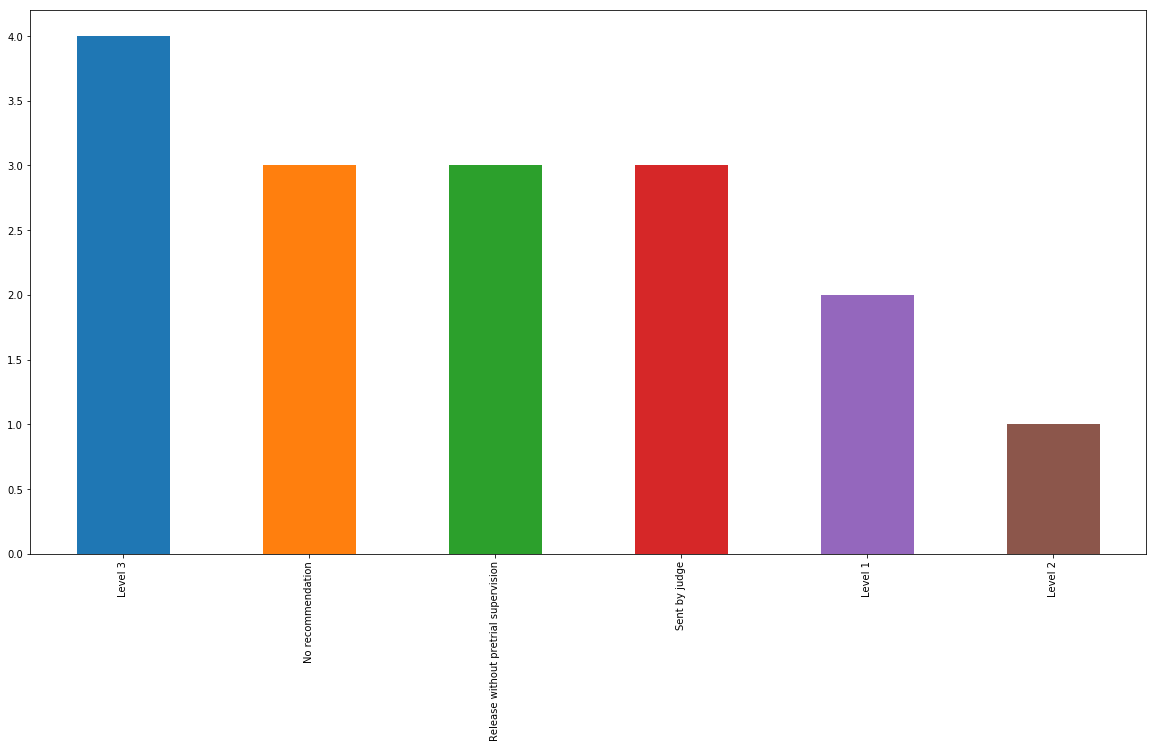

In [306]:
plt.figure(figsize=(20,10))
df_Detained_Whites['B'].value_counts().plot(kind='bar')

## By Gender

In [307]:
df_gender = df.filter(['charge_1','gender','risk_assess_level'], axis=1)

In [308]:
df_gender.head()

,charge_1,gender,risk_assess_level
0,robbery,M,Detain
1,burglary 1st,M,Detain
2,child abuse 2nd,M,Detain
3,non-support,M,Level 2
4,vop - cds possession not marijuana,M,Level 3


In [309]:
pivot_risk_gender = df_gender.pivot_table(index='charge_1', columns='gender',values='risk_assess_level',aggfunc='first')

In [310]:
pivot_risk_gender

gender,F,M
charge_1,,
access after statute,Release without pretrial supervision,None
accessory after the fact murder,None,No recommendation
act as contractor without a license,None,Release without pretrial supervision
aggravated animal cruelty,None,Level 4
alcoholic beverage public,None,Detain
alcoholic beverage retail,Detain,Detain
altered drug test,None,Detain
animal cruelty,None,Detain
armed robbery,Detain,Detain


In [311]:
pivot_risk_gender['Similarity'] = np.where(pivot_risk_gender['F']==pivot_risk_gender['M'], True, False)

In [312]:
pivot_risk_gender.head(20)

gender,F,M,Similarity
charge_1,,,
access after statute,Release without pretrial supervision,None,False
accessory after the fact murder,None,No recommendation,False
act as contractor without a license,None,Release without pretrial supervision,False
aggravated animal cruelty,None,Level 4,False
alcoholic beverage public,None,Detain,False
alcoholic beverage retail,Detain,Detain,True
altered drug test,None,Detain,False
animal cruelty,None,Detain,False
armed robbery,Detain,Detain,True


In [313]:
pivot_risk_gender.Similarity.value_counts()

False    302
True      68
Name: Similarity, dtype: int64

### For almost 82% of cases the risk assessment tool had different recommendation for Males and Females for the same charge commited

In [314]:
df_gender_compare = pivot_risk_gender[pivot_risk_gender.Similarity == False]

In [315]:
df_gender_compare.head(20)

gender,F,M,Similarity
charge_1,,,
access after statute,Release without pretrial supervision,None,False
accessory after the fact murder,None,No recommendation,False
act as contractor without a license,None,Release without pretrial supervision,False
aggravated animal cruelty,None,Level 4,False
alcoholic beverage public,None,Detain,False
altered drug test,None,Detain,False
animal cruelty,None,Detain,False
arson,None,Detain,False
arson 2nd,None,Detain,False


In [316]:
df_gender_compare=df_gender_compare.dropna()

In [317]:
df_gender_compare.F.value_counts()

Detain                                               12
No recommendation                                     6
Release without pretrial supervision                  5
Level 2                                               3
Release with pretrial supervision - level unknown     1
Sent by judge                                         1
PA Detainer                                           1
Name: F, dtype: int64

In [318]:
df_gender_compare.M.value_counts()

Detain                                  15
Level 3                                  8
Release without pretrial supervision     2
Level 2                                  2
Sent by judge                            1
Level 1                                  1
Name: M, dtype: int64

In [319]:
df_gender_graph = df_gender_compare[df_gender_compare.M == 'Detain']

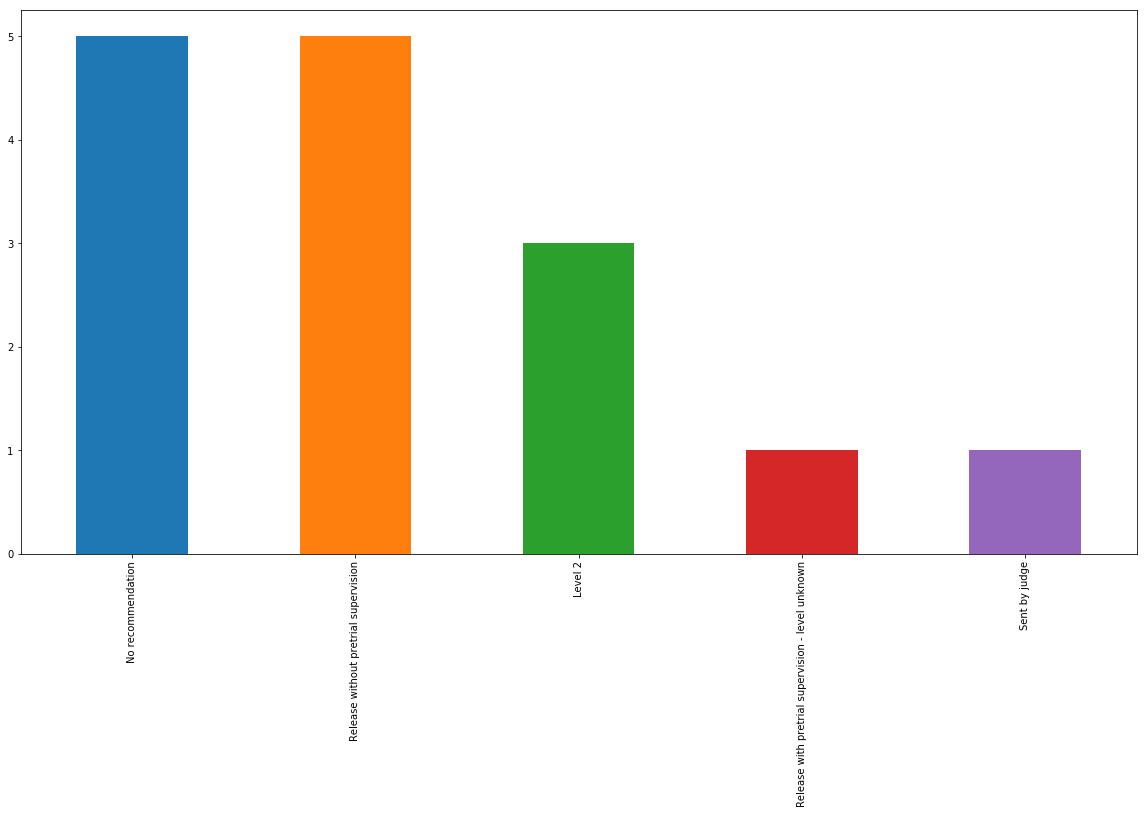

In [320]:
plt.figure(figsize=(20,10))
df_gender_graph['F'].value_counts().plot(kind='bar')

In [321]:
df_female_graph = df_gender_compare[df_gender_compare.F == 'Detain']

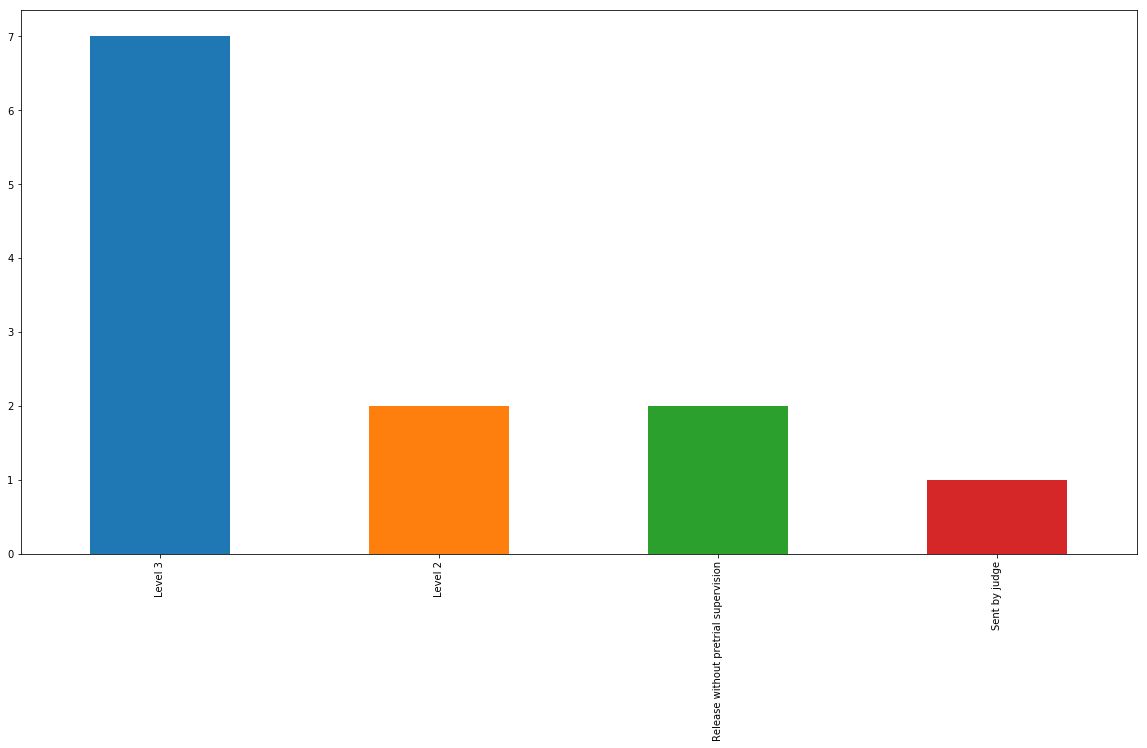

In [322]:
plt.figure(figsize=(20,10))
df_female_graph['M'].value_counts().plot(kind='bar')

No recommendation for defendants
Group charges


## By Age groups

In [4]:
new_df_age = df.filter(['charge_1','computed_age','risk_assess_level'], axis=1)

In [5]:
new_df_age.head(20)

,charge_1,computed_age,risk_assess_level
0,robbery,18.0,Detain
1,burglary 1st,24.0,Detain
2,child abuse 2nd,37.0,Detain
3,non-support,43.0,Level 2
4,vop - cds possession not marijuana,48.0,Level 3
5,dv - assault 1st,21.0,NaN
6,assault 2nd,39.0,Level 3
7,violate exparte,47.0,Sent by judge
8,vop - sex offense 3rd,69.0,No recommendation
9,theft 1500 to 25000,22.0,Level 1


In [6]:
new_df_age.computed_age.min()

16.0

In [7]:
new_df_age.computed_age.max()

77.0

In [8]:
age_ranges = ["{0} - {1}".format(age, age + 19) for age in range(16, 80, 20)]
age_ranges

['16 - 35', '36 - 55', '56 - 75', '76 - 95']

In [9]:
count_unique_age_ranges = len(age_ranges)
count_unique_age_ranges

4

In [10]:
new_df_age['age_range'] = pd.cut(x=new_df_age['computed_age'], bins=count_unique_age_ranges, labels=age_ranges)

In [11]:
new_df_age.head()

,charge_1,computed_age,risk_assess_level,age_range
0,robbery,18.0,Detain,16 - 35
1,burglary 1st,24.0,Detain,16 - 35
2,child abuse 2nd,37.0,Detain,36 - 55
3,non-support,43.0,Level 2,36 - 55
4,vop - cds possession not marijuana,48.0,Level 3,56 - 75


In [12]:
new_df_age.shape

(3049, 4)

In [331]:
new_df_age.age_range.value_counts()

16 - 35    1473
36 - 55    1056
56 - 75     445
76 - 95      24
Name: age_range, dtype: int64

In [332]:
new_df_age.drop(['computed_age'], axis=1).head()

,charge_1,risk_assess_level,age_range
0,robbery,Detain,16 - 35
1,burglary 1st,Detain,16 - 35
2,child abuse 2nd,Detain,36 - 55
3,non-support,Level 2,36 - 55
4,vop - cds possession not marijuana,Level 3,56 - 75


In [333]:
pivot_risk_age = new_df_age.pivot_table(index='charge_1', columns='age_range',values='risk_assess_level',aggfunc='first')

In [334]:
pivot_risk_age

age_range,16 - 35,36 - 55,56 - 75,76 - 95
charge_1,,,,
access after statute,Release without pretrial supervision,NaN,NaN,NaN
accessory after the fact murder,No recommendation,NaN,NaN,NaN
act as contractor without a license,NaN,Release without pretrial supervision,NaN,NaN
aggravated animal cruelty,NaN,Level 4,NaN,NaN
alcoholic beverage public,Detain,No recommendation,NaN,NaN
alcoholic beverage retail,NaN,Detain,Detain,NaN
altered drug test,Detain,Level 4,NaN,NaN
animal cruelty,Detain,NaN,NaN,NaN
armed robbery,Detain,Detain,Detain,NaN


In [342]:
pivot_risk_age.isna().sum()

age_range
16 - 35    117
36 - 55    166
56 - 75    250
76 - 95    350
dtype: int64

In [343]:
pivot_risk_age.dropna()

age_range,16 - 35,36 - 55,56 - 75,76 - 95
charge_1,,,,
arson threat,Detain,Detain,Detain,No recommendation
assault 1st,Detain,Detain,Detain,Detain
assault 2nd,Detain,Level 3,Detain,Detain
cds possession not marijuana,Sent by judge,Detain,Level 1,Detain
dui,Detain,Level 2,Detain,Release without pretrial supervision
dv - assault 2nd,Detain,Detain,Detain,Detain
dwi,Detain,Detain,Detain,Level 2
dws,Detain,Detain,Detain,Detain
fta - dws,Detain,Detain,Release without pretrial supervision,Release without pretrial supervision


In [340]:
pivot_risk_age.columns

CategoricalIndex(['16 - 35', '36 - 55', '56 - 75', '76 - 95'], categories=['16 - 35', '36 - 55', '56 - 75', '76 - 95'], ordered=True, name='age_range', dtype='category')

/Users/riyachanduka/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


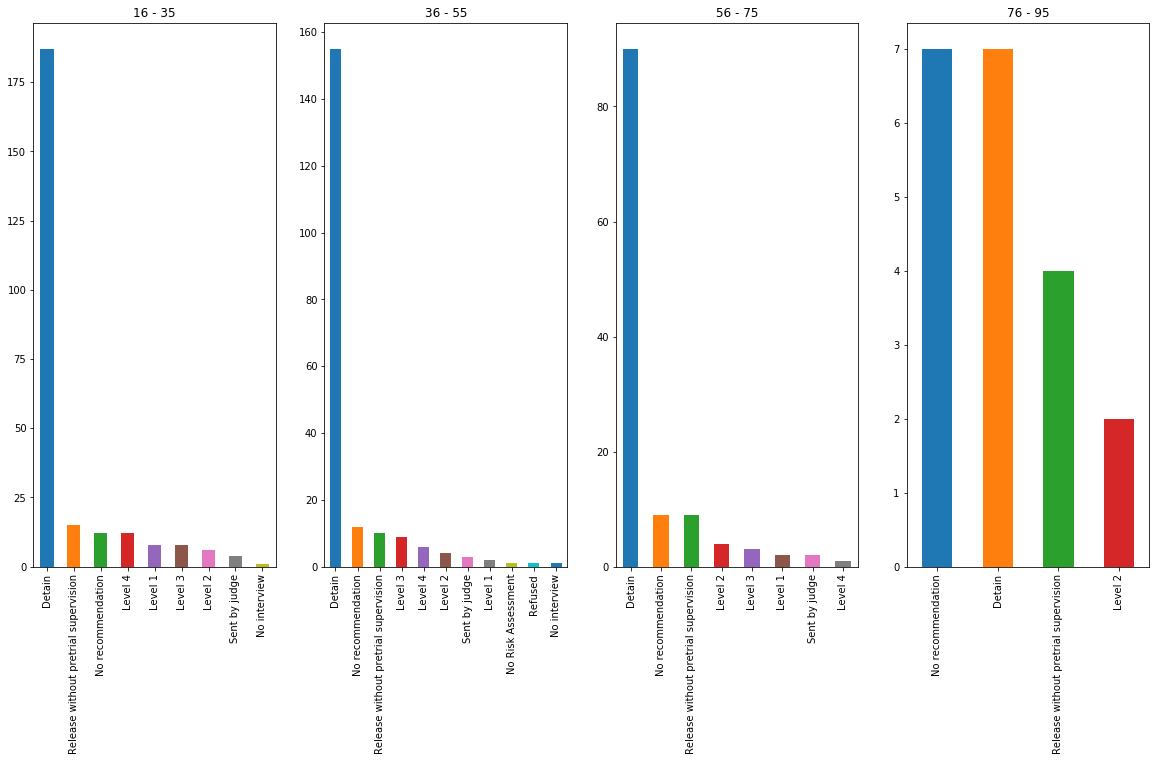

In [344]:
plt.figure(figsize=(20,20))
categorical_features = ['16 - 35', '36 - 55', '56 - 75', '76 - 95']
fig, ax = plt.subplots(1, len(categorical_features),figsize=(20,10))
for i, categorical_feature in enumerate(pivot_risk_age[categorical_features]):
    pivot_risk_age[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)
fig.show()